<a href="https://colab.research.google.com/github/cjallow01/deep-learning-challenge/blob/main/AlphabetSoupCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [17]:
 !pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
# from google.colab import drive

In [ ]:
# drive.mount('/content/gdrive')

In [5]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_charity = application_df.drop(columns=["EIN", "NAME"])
df_charity

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [7]:
# Determine the number of unique values in each column.
df_charity.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = df_charity['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts<400].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<800].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10531628,1,108590,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10547893,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10553066,1,6692,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,10556103,1,142590,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
# X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
# y = application_dummies['IS_SUCCESSFUL'].values

y = application_dummies["IS_SUCCESSFUL"]
X = application_dummies.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                294195    
                                                                 
 dense_1 (Dense)             (None, 25)                400       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 294,621
Trainable params: 294,621
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 6ms/step - loss: 0.4923 - accuracy: 0.7645
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.2524 - accuracy: 0.8919
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.1268 - accuracy: 0.9495
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.1021 - accuracy: 0.9589
Epoch 5/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0963 - accuracy: 0.9614
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0935 - accuracy: 0.9621
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0924 - accuracy: 0.9626
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0911 - accuracy: 0.9624
Epoch 9/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0898 - accuracy: 0.9629
Epoch 10/100
804/804 [==============================] - 5s 6ms/step - loss: 0.0890 - accura

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6765 - accuracy: 0.7420 - 939ms/epoch - 4ms/step
Loss: 0.6765239834785461, Accuracy: 0.7420408129692078


<AxesSubplot:>

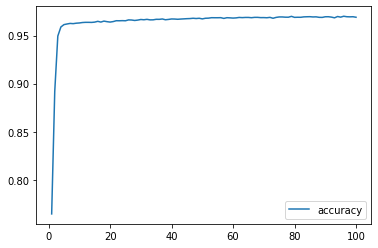

In [24]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [25]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity1.h5')

In [ ]:

# Attempt #1
# APPLICATION_TYPE cutoff = 500
# CLASSIFICATION cutoff = 800
# layer1 = 15 : activation function = relu
# layer2 = 25 : activation function = relu

# Loss: 0.5536191259042167, Accuracy: 0.727580189704895

# A loss value of 55 indicates that the model can be further optimized.
# The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

# I need to make some changes in order to get to 75% accuracy.

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 35

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                294195    
                                                                 
 dense_4 (Dense)             (None, 25)                400       
                                                                 
 dense_5 (Dense)             (None, 35)                910       
                                                                 
 dense_6 (Dense)             (None, 1)                 36        
                                                                 
Total params: 295,541
Trainable params: 295,541
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 7ms/step - loss: 0.4963 - accuracy: 0.7633
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.2462 - accuracy: 0.8959
Epoch 3/100
804/804 [==============================] - 5s 7ms/step - loss: 0.1125 - accuracy: 0.9563
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0982 - accuracy: 0.9605
Epoch 5/100
804/804 [==============================] - 5s 7ms/step - loss: 0.0942 - accuracy: 0.9614
Epoch 6/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0924 - accuracy: 0.9617
Epoch 7/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0909 - accuracy: 0.9623
Epoch 8/100
804/804 [==============================] - 5s 7ms/step - loss: 0.0902 - accuracy: 0.9625
Epoch 9/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0894 - accuracy: 0.9624
Epoch 10/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0893 - accura

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.8111 - accuracy: 0.6844 - 1s/epoch - 4ms/step
Loss: 0.8111224174499512, Accuracy: 0.6844314932823181


<AxesSubplot:>

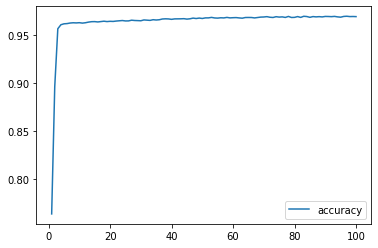

In [30]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [31]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity1.h5')

In [ ]:
# Attempt #2 -- adding a hidden layer
# APPLICATION_TYPE cutoff = 600
# CLASSIFICATION cutoff = 300
# layer1 = 15 : activation function = relu
# layer2 = 25 : activation function = relu
# layer3 = 35 : activation function = relu

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 35

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the st

In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# y_test = np.array(y_test)
# y_train = np.array(y_train)

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 7ms/step - loss: 0.4827 - accuracy: 0.7704
Epoch 2/100
804/804 [==============================] - 5s 7ms/step - loss: 0.2388 - accuracy: 0.9013
Epoch 3/100
804/804 [==============================] - 7s 8ms/step - loss: 0.1172 - accuracy: 0.9561
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0975 - accuracy: 0.9610
Epoch 5/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0930 - accuracy: 0.9621
Epoch 6/100
804/804 [==============================] - 5s 7ms/step - loss: 0.0916 - accuracy: 0.9626
Epoch 7/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0910 - accuracy: 0.9629
Epoch 8/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0899 - accuracy: 0.9629
Epoch 9/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0894 - accuracy: 0.9633
Epoch 10/100
804/804 [==============================] - 5s 7ms/step - loss: 0.0890 - accura

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6973 - accuracy: 0.7255 - 929ms/epoch - 3ms/step
Loss: 0.6973182559013367, Accuracy: 0.7254810333251953


<AxesSubplot:>

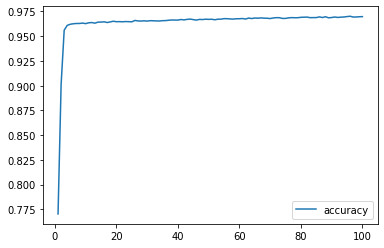

In [36]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [37]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity2.h5')

In [ ]:
# Attempt #2 -- adding a hidden layer
# APPLICATION_TYPE cutoff = 600
# CLASSIFICATION cutoff = 300
# layer1 = 15 : activation function = relu
# layer2 = 25 : activation function = relu
# layer3 = 35 : activation function = relu